In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

In [11]:
class normalizeTable():
    
    class normalize:
        def __init__(self, data):
            self.normalizeData(data)

        def normalizeData(self, data):
            self.mean = np.mean(data)
            self.std  = data.std()
            if (self.std == 0):
                self.norData = data + 0.001
            else:
                self.norData = ((data - self.mean) / self.std) + 0.001
                
        def normalizeVal(self, value):
            return ((value - self.mean) / self.std) + 0.001        

        def getNorData(self):
            return self.norData
    
    def __init__(self, data):
        rows, cols = data.shape
        self.features = []
        norData  = np.zeros_like(data)
        for col in range(cols):
            self.features.append(self.normalize(data[:,col]))
            norData[:,col] = self.features[col].getNorData()

        self.X = norData[:,0:data.shape[1]-1]
        self.Y = np.matrix(norData[:,-1])
    
    def getXY_features(self):
        return self.X, self.Y.T, self.features
    
    def __call__(self, feature, value):
        self.features[feature].normalizeVal( value )

def show(X, Y, Y2, labels):
    plt.figure()
    plt.title('Normalize Data')
    for col in range(X.shape[1]):
        plt.plot(X[:,col], label=labels[col])
    plt.plot(Y, label=labels[-2])
    plt.plot(Y2, label=labels[-1])
    plt.legend()
    plt.grid()
    
def costFunction(X, Y, theta):
    return np.sum((X * theta.T - Y)**2)

def computeCost(X, Y, theta):
    inner = np.power(((X * theta.T) - Y), 2)
    return np.sum(inner / (2 * len(X)))

def gradientDescent(X, Y, theta, alpha, iters):
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - Y
        for j in range(parameters):
            term = np.multiply(error.T, X[:,j])
            theta[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
        cost[i] = computeCost(X, Y, theta)
        
    return theta, cost

In [31]:
data = np.array([[1,2104,3,399900],
    [1,1600,3,329900],
    [1,2400,3,369000],
    [1,1416,2,232000],
    [1,3000,4,539900]]).astype(float)
labels = ['off','sqrt','bdr','price', 'est.']

normData = normalizeTable(data)
X, Y, features = normData.getXY_features()

theta = np.matrix([-2.12, 0.21, 0.34])
Y = X * theta.T


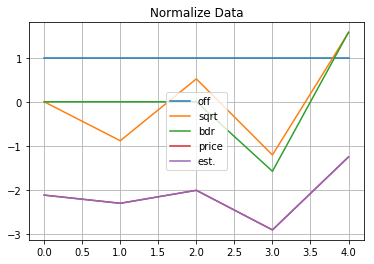

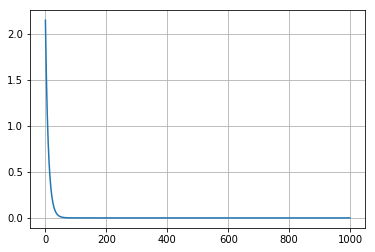

In [32]:
alpha = 0.05
iters = 1000
theta = np.matrix([0, 0, 0]).astype(float)
theta, cost = gradientDescent(X, Y, theta, alpha, iters)

Y2 = X * theta.T
show(X, Y, Y2, labels)

plt.figure()
plt.plot(cost)
plt.grid()

In [22]:
print( theta )

[[0.11999495 0.22968146 0.32031854]]
